In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Download from Gdrive

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nDeTk3yMUqYLFu99yXDojyl3dPMHYp1v' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nDeTk3yMUqYLFu99yXDojyl3dPMHYp1v" -O shopee-product-detection-dataset.zip && rm -rf /tmp/cookies.txt

--2020-07-04 04:02:00--  https://docs.google.com/uc?export=download&confirm=72Jo&id=1nDeTk3yMUqYLFu99yXDojyl3dPMHYp1v
Resolving docs.google.com (docs.google.com)... 108.177.119.100, 108.177.119.102, 108.177.119.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.119.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-50-docs.googleusercontent.com/docs/securesc/4scqfk8ev9vl48dusmt5nqprqe60rhhj/rup9q2m1ng0blq9fqq16vnghaivjtmet/1593835275000/13793038594932301905/04624068116836533081Z/1nDeTk3yMUqYLFu99yXDojyl3dPMHYp1v?e=download [following]
--2020-07-04 04:02:01--  https://doc-0s-50-docs.googleusercontent.com/docs/securesc/4scqfk8ev9vl48dusmt5nqprqe60rhhj/rup9q2m1ng0blq9fqq16vnghaivjtmet/1593835275000/13793038594932301905/04624068116836533081Z/1nDeTk3yMUqYLFu99yXDojyl3dPMHYp1v?e=download
Resolving doc-0s-50-docs.googleusercontent.com (doc-0s-50-docs.googleusercontent.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connec

Onedrive

In [ ]:
!wget "https://onedrive.live.com/download?cid=800E0ECEA419C6FE&resid=800E0ECEA419C6FE%219099&authkey=AGPNcxcTAVMns7k" -O shopee-product-detection-dataset.zip

--2020-07-03 18:06:40--  https://onedrive.live.com/download?cid=800E0ECEA419C6FE&resid=800E0ECEA419C6FE%219099&authkey=AGPNcxcTAVMns7k
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://fbluna.by.files.1drv.com/y4msu5MfS2IPgrHgjN4WMd5SHiMyCQisM1ze7CWRcX3Ke8Cv1sVFdxx5GGH4B0TwpsTYSH2N5Pwh6TGpch8mcCqKrlK1KDTY-QqAtle-HCN5LXrnjfy5-TGTlOK0d6dN-FFF1Nr3McHtgnGheDE-lOeoAUTEK0HKRFfuxVzu3fvbJb0dKU4AoRoBdhyXnBBSCZmpmgq4ZoGh5kNc8GkGQ1AEA/shopee-product-detection-dataset-cleaned.zip?download&psid=1 [following]
--2020-07-03 18:06:40--  https://fbluna.by.files.1drv.com/y4msu5MfS2IPgrHgjN4WMd5SHiMyCQisM1ze7CWRcX3Ke8Cv1sVFdxx5GGH4B0TwpsTYSH2N5Pwh6TGpch8mcCqKrlK1KDTY-QqAtle-HCN5LXrnjfy5-TGTlOK0d6dN-FFF1Nr3McHtgnGheDE-lOeoAUTEK0HKRFfuxVzu3fvbJb0dKU4AoRoBdhyXnBBSCZmpmgq4ZoGh5kNc8GkGQ1AEA/shopee-product-detection-dataset-cleaned.zip?download&psi

In [ ]:
!unzip /content/shopee-product-detection-dataset.zip

Constructing the model

In [ ]:
import tensorflow as tf

#Refer to https://keras.io/api/applications/ for the list of Pre-trained Models

Original_NASNetLarge = tf.keras.applications.NASNetLarge()
# summarize
Original_NASNetLarge.summary()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential

NASNetLarge = tf.keras.applications.NASNetLarge(include_top=False, pooling='avg', weights='imagenet', input_shape=(331, 331, 3))
# add new classifier layers
model = Sequential()
model.add(NASNetLarge)
model.add(Dense(42, activation='softmax')) #num_classes = 42
model.layers[0].trainable = False
# summarize
model.summary()

343613440/343610240 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 4032)              84916818  
_________________________________________________________________
dense (Dense)                (None, 42)                169386    
Total params: 85,086,204
Trainable params: 169,386
Non-trainable params: 84,916,818
_________________________________________________________________


Loading Data


Make sure ur data directory is as such:
* data/
* data/train/
* data/train/red/
* data/train/blue/
* data/test/
* data/test/red/
* data/test/blue/
* data/validation/
* data/validation/red/
* data/validation/blue/

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
# create generator
datagen = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.nasnet.preprocess_input, 
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=[0.7,1.3],
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.35)
# prepare an iterator for each dataset
train_it = datagen.flow_from_directory('/content/train/train', target_size=(331, 331), batch_size=32, class_mode='categorical', shuffle=True, subset='training')
# No Image Augmentation needed for test and validation set
val_it = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.nasnet.preprocess_input, validation_split=0.35).flow_from_directory('/content/train/train', target_size=(331, 331),  batch_size=32, class_mode='categorical', shuffle=False, subset='validation')
test_it = ImageDataGenerator(preprocessing_function=tensorflow.keras.applications.nasnet.preprocess_input).flow_from_directory('/content/test', target_size=(331, 331),  batch_size=32, class_mode='categorical', shuffle=False)
# confirm the iterator works
batchX, batchy = train_it.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))
print('Batchy shape=', batchy.shape)

testX = test_it.next()
print(testX)

Using TensorFlow backend.


Found 64546 images belonging to 42 classes.
Found 34722 images belonging to 42 classes.
Found 12192 images belonging to 1 classes.
Batch shape=(32, 331, 331, 3), min=-1.000, max=1.000
Batchy shape= (32, 42)
(array([[[[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         ...,
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ]],

        [[ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         [ 1.        ,  1.        ,  1.        ],
         .

Compile and Fit with checkpoints every 1 epoch

In [ ]:
import os
from tensorflow import keras

# Prepare a directory to store all the checkpoints.
checkpoint_dir = '/content/drive/My Drive/chkpt'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

from tensorflow import keras

callbacks = [
    # This callback saves a SavedModel every 1 batches.
    # We include the training loss in the folder name.
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir + '/Ckpt.{epoch:02d}-{loss:.2f}.h5', save_freq='epoch'),

    #keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),

    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2),

    keras.callbacks.TensorBoard(log_dir="./logs")
]

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
model.compile(optimizer=opt, loss=tensorflow.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.fit(train_it, validation_data = val_it, callbacks=callbacks, epochs=3)

Epoch 1/3
2018/2018 [==============================] - 4046s 2s/step - loss: 0.6574 - accuracy: 0.8086 - val_loss: 0.7498 - val_accuracy: 0.7973 - lr: 1.0000e-04
Epoch 2/3
2018/2018 [==============================] - 4051s 2s/step - loss: 0.6572 - accuracy: 0.8106 - val_loss: 0.7495 - val_accuracy: 0.7972 - lr: 1.0000e-04
Epoch 3/3
2018/2018 [==============================] - 4056s 2s/step - loss: 0.6564 - accuracy: 0.8111 - val_loss: 0.7492 - val_accuracy: 0.7973 - lr: 1.0000e-04


No. of Epochs done: 7
Current run: 3

Prediction (Test)

In [ ]:
print(sorted(test_it.filenames))

In [ ]:
import numpy as np
probs = model.predict(test_it)
prediction = [np.argmax(score, axis=-1) for score in probs]

print(prediction[:20])
print(test_it.filenames)

In [ ]:
#Save the probabilities

np.save('/content/drive/My Drive/nasprobs_test', probs)

Visualisation

In [ ]:
cm = tf.math.confusion_matrix(
    test_it.classes, prediction, num_classes=42
)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import itertools

def plot_confusion_matrix(cm, class_names, show_stats=True, show_errors_larger_than=0.03):
  """
  Returns a matplotlib figure containing the plotted confusion matrix.

  Args:
    cm (array, shape = [n, n]): a confusion matrix of integer classes
    class_names (array, shape = [n]): String names of the integer classes
  """
  figure = plt.figure(figsize=(20, 20))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Confusion matrix")
  plt.colorbar()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names, rotation=90)
  plt.yticks(tick_marks, class_names)

  if show_stats is True:
    # Normalize the confusion matrix.
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)

    # Use white text if squares are dark; otherwise black.
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      color = "white" if cm[i, j] > threshold else "black"
      if cm[i, j] >= show_errors_larger_than:
        plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)

    # TODO: allow setting a threshold and hide not as significant errors i.e. <=0.03

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  return figure

In [ ]:
class_names = category_dict.values()

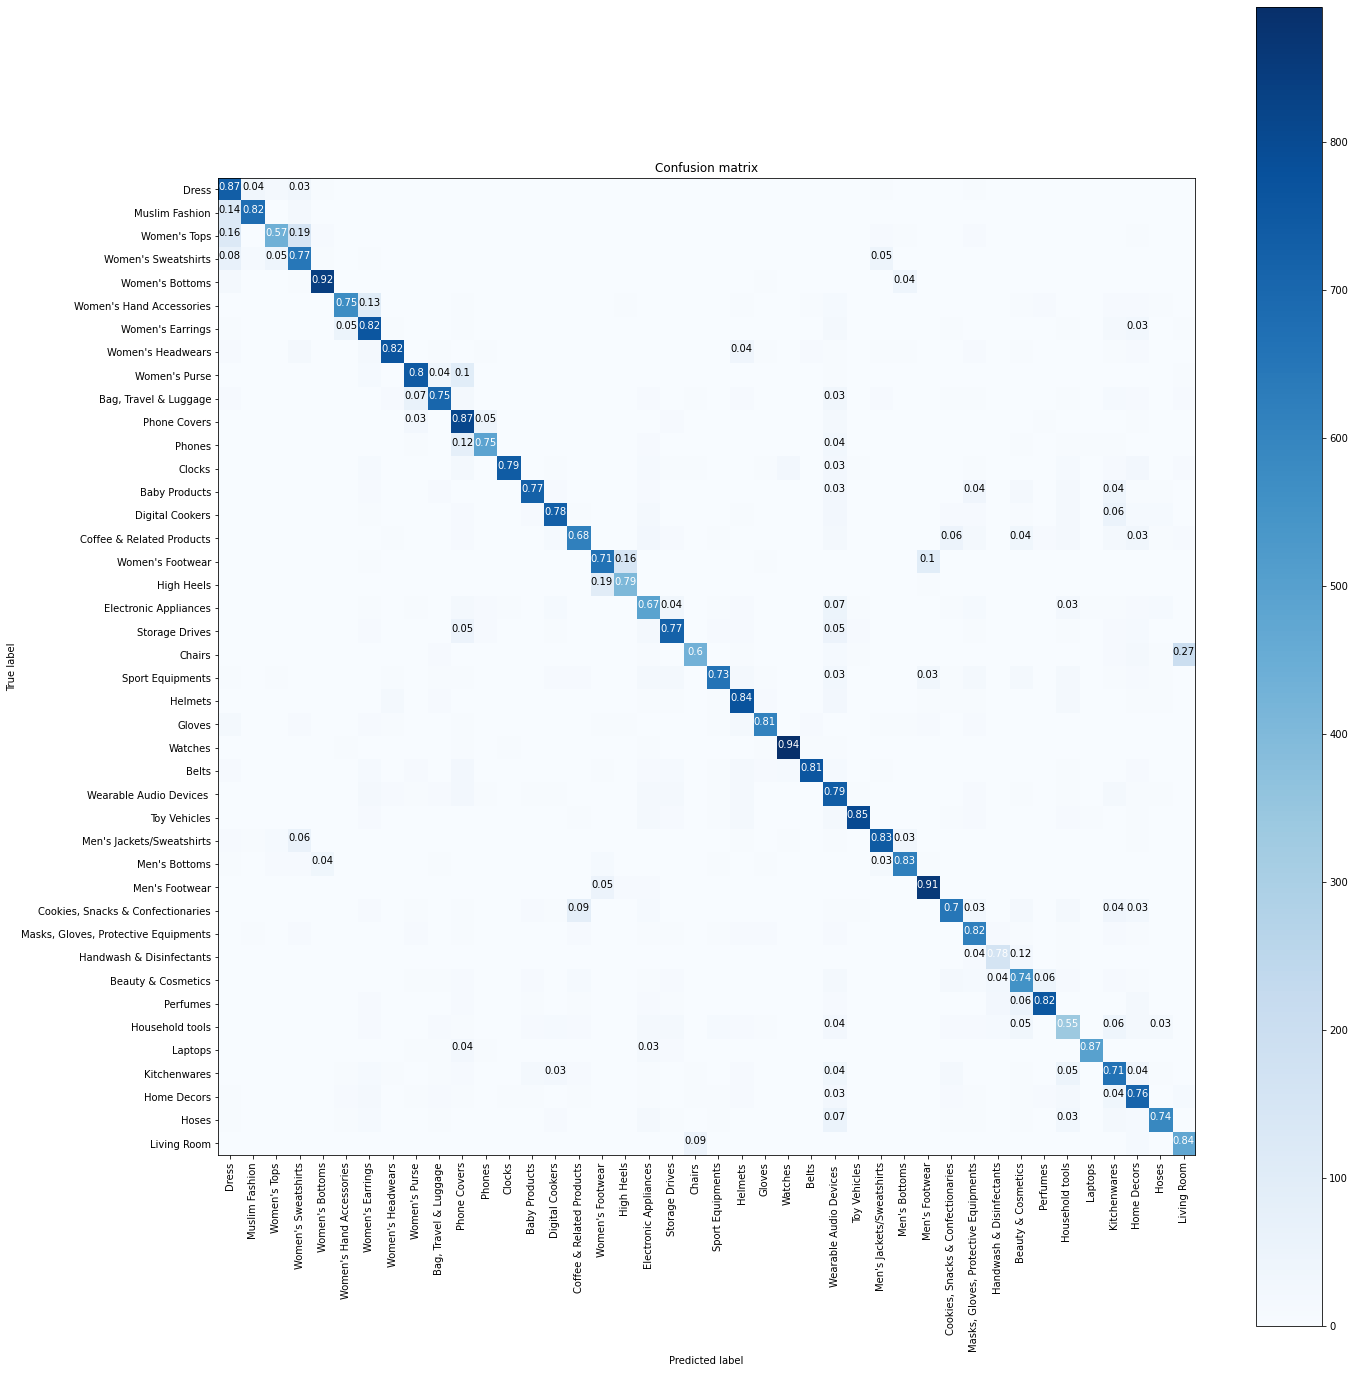

In [ ]:
fig = plot_confusion_matrix(cm.numpy(), class_names)
print('')

In [ ]:
fig.savefig('cm-fig-name.png')

Print Results to CSV

In [ ]:
# predictions = {}
# for x in range(len(test_it.filenames)):
#   filename = test_it.filenames[x].replace('test/', '')
#   predictions[filename] = prediction[x]

predictions = {}
for x in range(len(test_it.filenames)):
  filename = test_it.filenames[x].replace('test/', '')
  
  # zero padding
  zero_padded_predicted_cat = f'{prediction[x]:02}'

  predictions[filename] = zero_padded_predicted_cat

In [ ]:
import pandas as pd

df = pd.read_csv('/content/test.csv')

df['category'] = df['filename'].map(predictions)
df.set_index('filename', inplace=True)

print(df)
df.to_csv('/content/drive/My Drive/test.csv')

                                     category
filename                                     
fd663cf2b6e1d7b02938c6aaae0a32d2.jpg       20
c7fd77508a8c355eaab0d4e10efd6b15.jpg       27
127f3e6d6e3491b2459812353f33a913.jpg       04
5ca4f2da11eda083064e6c36f37eeb81.jpg       22
46d681a542f2c71be017eef6aae23313.jpg       12
...                                       ...
5ba958eacb23cd7d1673bad4dae55784.jpg       16
efbe41a1c2b666b70e337e438559808b.jpg       19
79fdaa5ac5ba10dbe8004cabd8c35eb3.jpg       13
ac3d136124617637a05ba66694e381ef.jpg       15
7ef61d7cfbad9cfe2db4f64560e3dddd.jpg       23

[12186 rows x 1 columns]


Saving the model

In [ ]:
model.save('/content/drive/My Drive/NasNet1.h5')

Loading the model

In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
# load model
model = tensorflow.keras.models.load_model('/content/drive/My Drive/chkpt/Nasnet 9 Epoch.h5')
# summarize model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 4032)              84916818  
_________________________________________________________________
dense (Dense)                (None, 42)                169386    
Total params: 85,086,204
Trainable params: 169,386
Non-trainable params: 84,916,818
_________________________________________________________________
